In [1]:
import torch
import random
import numpy as np

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministc = True

In [3]:
import torchvision.datasets

In [4]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [6]:
len(y_train), len(y_test)

(60000, 10000)

In [7]:
import matplotlib.pyplot as plt

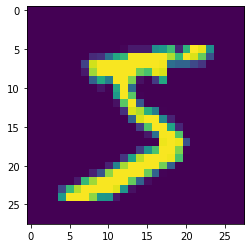

tensor(5)


In [8]:
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [9]:
X_train.shape

torch.Size([60000, 28, 28])

In [10]:
X_test.shape

torch.Size([10000, 28, 28])

In [11]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [12]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [13]:
X_test.shape

torch.Size([10000, 1, 28, 28])

In [14]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()

    self.conv1 = torch.nn.Conv2d(in_channels=1,
                                 out_channels=6,
                                 kernel_size=5,
                                 padding=2)
    self.act1 = torch.nn.Tanh()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

    self.conv2 = torch.nn.Conv2d(in_channels=6,
                                 out_channels=16,
                                 kernel_size=5,
                                 padding=0)
    self.act2 = torch.nn.Tanh()
    self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

    self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
    self.act3 = torch.nn.Tanh()

    self.fc2 = torch.nn.Linear(120, 84)
    self.act4 = torch.nn.Tanh()

    self.fc3 = torch.nn.Linear(84, 10)

  def forward(self, x):

    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool2(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)

    return x

In [15]:
lenet5 = LeNet5()

In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [17]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [18]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index : start_index + batch_size]

    X_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)

    preds = lenet5.forward(X_batch)

    loss_value = loss(preds, y_batch)
    loss_value.backward()

    optimizer.step()

  test_preds = lenet5.forward(X_test)
  test_loss_history.append(loss(test_preds, y_test).data.cpu())

  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
  test_accuracy_history.append(accuracy)

  print(accuracy)

tensor(0.9756)
tensor(0.9835)
tensor(0.9861)
tensor(0.9871)
tensor(0.9899)
tensor(0.9883)
tensor(0.9875)
tensor(0.9875)
tensor(0.9852)
tensor(0.9879)
tensor(0.9888)
tensor(0.9895)
tensor(0.9847)
tensor(0.9861)
tensor(0.9879)
tensor(0.9878)
tensor(0.9880)
tensor(0.9884)
tensor(0.9894)
tensor(0.9895)
tensor(0.9897)
tensor(0.9892)
tensor(0.9862)
tensor(0.9896)
tensor(0.9881)
tensor(0.9882)
tensor(0.9876)
tensor(0.9886)


KeyboardInterrupt: ignored

In [19]:
lenet5.forward(X_test)

tensor([[ -3.3070,   1.1805,  -0.9052,  ...,  18.0136,  -3.8478,   2.6362],
        [  0.5025,  -0.4765,  19.6365,  ...,  -2.9364,   2.8570,  -7.7392],
        [ -6.9893,  17.9952,  -0.2298,  ...,   3.2612,   2.2767,  -7.9766],
        ...,
        [ -4.8083,   0.1063,  -5.1635,  ...,   2.0325,  -0.9390,   4.4571],
        [ -1.8060,  -1.9385,  -7.1828,  ...,  -6.3033,   2.1262,  -2.0162],
        [  1.6077,  -0.9903,   2.0286,  ..., -12.1340,  -0.8486,  -4.9034]],
       device='cuda:0', grad_fn=<AddmmBackward>)

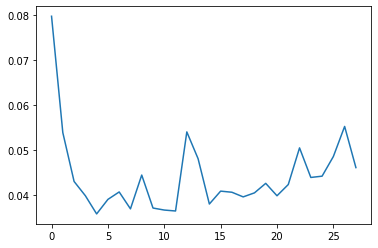

In [23]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history);